Number of images in the dataset: 14844
Sample keys: dict_keys(['LR', 'HR', 'SR'])
Low-resolution image shape: torch.Size([1, 1024, 1024])
High-resolution image shape: torch.Size([1, 1024, 1024])


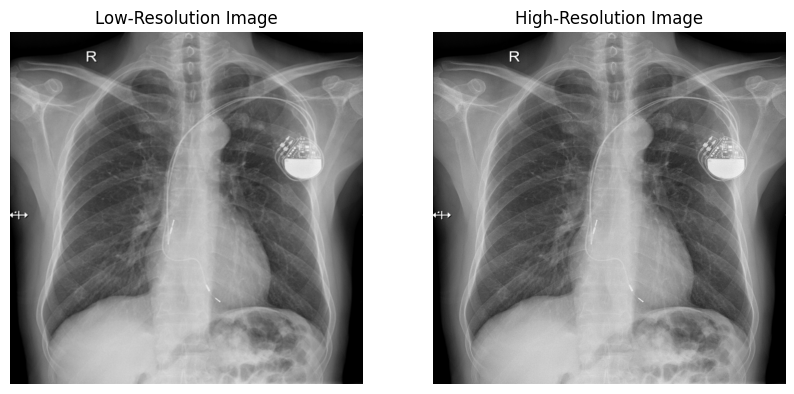

In [3]:
from torchvision.transforms import Compose, ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset, Dataset
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the root directory containing the dataset
root_dir = '/local_storage/aryan_train'

# Define the transforms to be applied to the images
transforms = Compose([ToTensor()])
class CustomSRDataset(Dataset):
    def __init__(self, root: str, transforms: Compose) -> None:
        self.root = root
        self.transforms = transforms

        self.sr_dir = os.path.join(root, 'sr_images')
        self.hr_dir = os.path.join(root, 'hr_images')
        self.image_names = os.listdir(self.sr_dir)

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx: int):
        img_name = self.image_names[idx]

        sr_img_path = os.path.join(self.sr_dir, img_name)
        hr_img_path = os.path.join(self.hr_dir, img_name)

        sr_img = Image.open(sr_img_path).convert('L')  # Assuming grayscale images
        hr_img = Image.open(hr_img_path).convert('L')  # Assuming grayscale images

        sr_img = self.transforms(sr_img)
        hr_img = self.transforms(hr_img)

        return {'LR': sr_img, 'HR': hr_img, 'SR': sr_img}

# Create an instance of the CustomSRDataset
dataset = CustomSRDataset(root=root_dir, transforms=transforms)

# Test dataset length
print("Number of images in the dataset:", len(dataset))

# Test dataset indexing
idx = 4326  # Choose an index to retrieve a sample
sample = dataset[idx]
print("Sample keys:", sample.keys())
print("Low-resolution image shape:", sample['LR'].shape)
print("High-resolution image shape:", sample['HR'].shape)

# Visualize the first sample
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(sample['LR'].squeeze(), cmap='gray')
axes[0].set_title('Low-Resolution Image')
axes[0].axis('off')
axes[1].imshow(sample['HR'].squeeze(), cmap='gray')
axes[1].set_title('High-Resolution Image')
axes[1].axis('off')
plt.show()
